<a href="https://colab.research.google.com/github/alicecongiu01-oss/NLP/blob/main/Exercise_1_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#load texts from https://www.gutenberg.org/
import urllib.request

text_en_url = "https://www.gutenberg.org/cache/epub/31270/pg31270.txt" # The Writings of Thomas Paine
text_it_url = "https://www.gutenberg.org/cache/epub/62302/pg62302.txt" # Scritti Politici

text_en = urllib.request.urlopen(text_en_url).read()
text_it = urllib.request.urlopen(text_it_url).read()

# decode texts with UTF-8 Encoding
text_en = text_en.decode("utf-8")
text_it = text_it.decode("utf-8")

In [37]:
# preprocessing
import re

# start and end phrases
# en
start_phrase_en = "THE WRITINGS OF THOMAS PAINE, VOLUME I."
end_phrase_en   = "END OF PART II"

#it
start_phrase_it = "SCRITTI POLITICI"
end_phrase_it = "FINE."

# extract main content
# en
start_en = text_en.find(start_phrase_en)
end_en = text_en.find(end_phrase_en)
text_en_clean = text_en[start_en:end_en + len(end_phrase_en)] # include end_en

# it
start_it = text_it.find(start_phrase_it)
end_it = text_it.find(end_phrase_it)
text_it_clean = text_it[start_it:end_it + len(end_phrase_it)] # include end_it

# remove whitespaces
text_en_clean = re.sub(r"\s+", " ", text_en_clean).strip()
text_it_clean = re.sub(r"\s+", " ", text_it_clean).strip()

In [38]:
#import spacy
import spacy

# install pipelines and create Doc object
# en_core_news_sm
!python -m spacy download en_core_web_sm
import en_core_web_sm
nlp_en = en_core_web_sm.load()
doc_en = nlp_en(text_en_clean)

# it_core_news_sm
!python -m spacy download it_core_news_sm
import it_core_news_sm
nlp_it = it_core_news_sm.load()
nlp_it.max_length = 1114143 # increase max_lenght to accomodate text
doc_it = nlp_it(text_it_clean)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 64.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 48.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [39]:
#tokenisation
# en
words_en = [token.lower_ # all tokens in lower case
            for token in doc_en
            if token.is_alpha] # all tokens are alphabetic characters

# it
words_it = [token.lower_ # all tokens in lower case
            for token in doc_it
            if token.is_alpha] # all tokens are alphabetic characters

In [40]:
# Compute tokens and types
# en
num_tokens_en = len(words_en)
print("Total English tokens: ", num_tokens_en)
types_en = len(set(words_en))
print("English types:", types_en)

print()

# it
num_tokens_it = len(words_it)
print("Total Italian tokens:", num_tokens_it)
types_it = len(set(words_it))
print("Italian types: ", types_it)

Total English tokens:  170750
English types: 9721

Total Italian tokens: 176689
Italian types:  21366


In [41]:
# set up the envoironment for Zipf's law of abbreviation
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [42]:
# df with words and frequencies
# en
df_en = pd.DataFrame.from_records(list(dict(Counter(words_en)).items()), columns = ["word", "frequency"])
df_en

,word,frequency
0,the,12676
1,writings,13
2,of,8233
3,thomas,17
4,paine,71
...,...,...
9716,approving,1
9717,subscribed,1
9718,guineas,1
9719,advertising,1


In [43]:
# df with words and frequencies
# it
df_it = pd.DataFrame.from_records(list(dict(Counter(words_it)).items()), columns = ["word", "frequency"])
df_it

,word,frequency
0,scritti,18
1,politici,36
2,di,5981
3,terenzio,23
4,mamiani,57
...,...,...
21361,peccati,1
21362,segnò,1
21363,intiero,1
21364,ripristinare,1


In [44]:
# order words by frequency (descending order) and assign rank
# en
df_en = df_en.sort_values(by=["frequency"], ascending=False)
df_en["rank"] = list(range(1, len(df_en) + 1))
df_en

,word,frequency,rank
0,the,12676,1
2,of,8233,2
8,and,6159,3
40,to,5650,4
78,a,3862,5
...,...,...,...
9684,hammer,1,9717
9683,enraging,1,9718
9682,satisfying,1,9719
9681,daughters,1,9720


In [45]:
# order words by frequency (descending order) and assign rank
# it
df_it = df_it.sort_values(by=["frequency"], ascending=False)
df_it["rank"] = list(range(1, len(df_it) + 1))
df_it

,word,frequency,rank
44,e,12362,1
2,di,5981,2
31,che,3875,3
45,la,3298,4
41,il,2974,5
...,...,...,...
21315,sensati,1,21362
21316,ripararlo,1,21363
21317,scoppiato,1,21364
21347,soccombere,1,21365


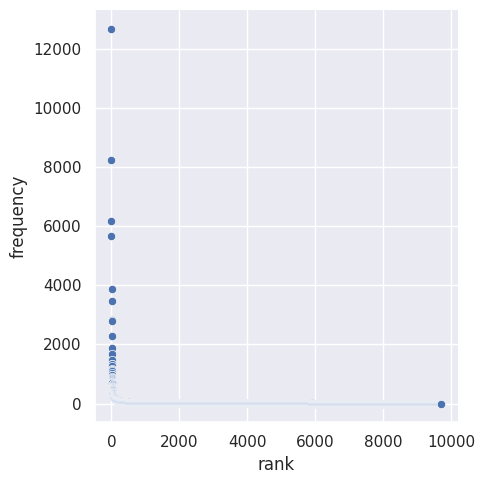

In [46]:
# en linear graph
sns.relplot(x="rank", y="frequency", data=df_en);
plt.show()
plt.close()

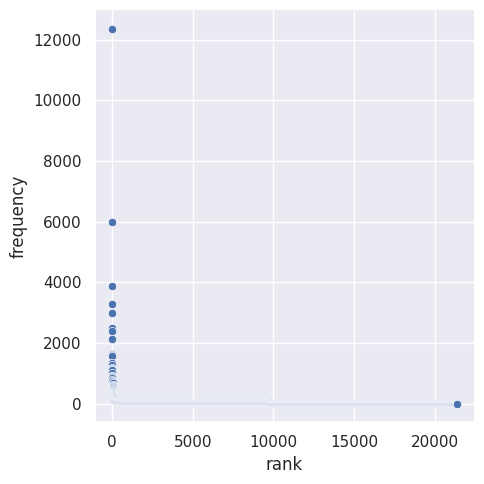

In [47]:
# it linear graph
sns.relplot(x="rank", y="frequency", data=df_it);
plt.show()
plt.close()

In [48]:
# import log to compress frequencies
import math
from math import log

In [49]:
# en log frequencies
df_en["logfreq"] = [log(x+1) for x in df_en["frequency"]]
df_en

,word,frequency,rank,logfreq
0,the,12676,1,9.447545
2,of,8233,2,9.016027
8,and,6159,3,8.725832
40,to,5650,4,8.639588
78,a,3862,5,8.259199
...,...,...,...,...
9684,hammer,1,9717,0.693147
9683,enraging,1,9718,0.693147
9682,satisfying,1,9719,0.693147
9681,daughters,1,9720,0.693147


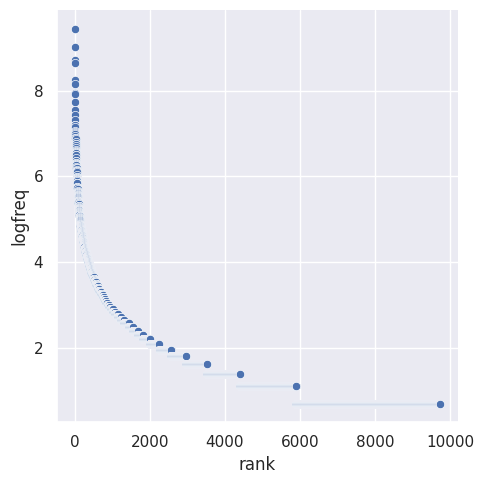

In [50]:
# en log frequecies graph
sns.relplot(x="rank", y="logfreq", data=df_en);
plt.show()
plt.close()

In [51]:
# it log frequencies
df_it["logfreq"] = [log(x+1) for x in df_it["frequency"]]
df_it

,word,frequency,rank,logfreq
44,e,12362,1,9.422463
2,di,5981,2,8.696510
31,che,3875,3,8.262559
45,la,3298,4,8.101375
41,il,2974,5,7.997999
...,...,...,...,...
21315,sensati,1,21362,0.693147
21316,ripararlo,1,21363,0.693147
21317,scoppiato,1,21364,0.693147
21347,soccombere,1,21365,0.693147


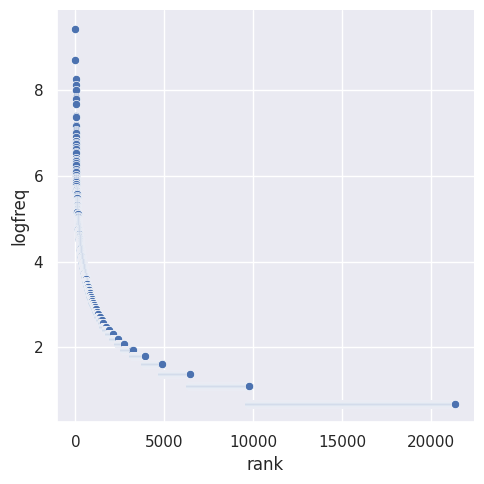

In [52]:
# it log frequencies graph
sns.relplot(x="rank", y="logfreq", data=df_it);
plt.show()
plt.close()